<a href="https://colab.research.google.com/github/wvirany/microbiome/blob/main/rel_abundance_Dec4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.linear_model import Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action='ignore', category=Performance)

## Data Loading and Preprocessing

In [96]:
ibd = pd.read_csv("ibd_rel_abundance.csv")
healthy = pd.read_csv("healthy_rel_abundance.csv")

In [97]:
print(ibd.shape)
ibd.head()

(1201, 579)


,Phocaeicola vulgatus,Bacteroides uniformis,Bacteroides thetaiotaomicron,Faecalibacterium prausnitzii,Roseburia faecis,Bacteroides caccae,Enterocloster clostridioformis,Bacteroides fragilis,Fusicatenibacter saccharivorans,Flavonifractor plautii,...,Prevotella histicola,Prevotella pallens,Chlamydia ibidis,Enterococcus mundtii,Anaerostipes sp. 992a,Actinobaculum sp. oral taxon 183,Lachnoclostridium sp. An298,Haemophilus haemolyticus,Enterococcus dispar,Atopobium minutum
0,8436640,6235541,1357098,1054351,999360,551484,334448,168192,139201,133264,...,0,0,0,0,0,0,0,0,0,0
1,17080974,9468596,2861845,189087,190713,479440,315591,182143,268493,427323,...,0,0,0,0,0,0,0,0,0,0
2,12088033,14919763,7543241,452106,455094,1991901,537137,7969977,5346,185637,...,0,0,0,0,0,0,0,0,0,0
3,9174317,15253970,4019070,988736,429513,964149,46820,3271311,37552,86170,...,0,0,0,0,0,0,0,0,0,0
4,3662205,8560295,7882055,817546,814911,686063,27640,4984518,9446,411733,...,0,0,0,0,0,0,0,0,0,0


In [98]:
print(healthy.shape)
healthy.head()

(426, 579)


,Phocaeicola vulgatus,Bacteroides uniformis,Bacteroides thetaiotaomicron,Faecalibacterium prausnitzii,Roseburia faecis,Bacteroides caccae,Enterocloster clostridioformis,Bacteroides fragilis,Fusicatenibacter saccharivorans,Flavonifractor plautii,...,Prevotella histicola,Prevotella pallens,Chlamydia ibidis,Enterococcus mundtii,Anaerostipes sp. 992a,Actinobaculum sp. oral taxon 183,Lachnoclostridium sp. An298,Haemophilus haemolyticus,Enterococcus dispar,Atopobium minutum
0,3533802,0,1337816,687547,53255,715021,0,372727,65730,0,...,0,0,0,0,0,0,0,0,0,0
1,6064315,0,3210841,1360390,170153,988210,0,556607,6110,0,...,0,0,0,0,0,0,0,0,0,0
2,8981714,417246,2959316,3261926,428559,2618916,0,378112,43182,3868,...,0,0,0,0,0,0,0,0,0,0
3,4846186,668638,127925,1308172,247559,445041,0,0,85596,77852,...,0,0,0,0,0,0,0,0,0,0
4,3127461,0,1190156,1030098,126186,804786,0,135517,47591,0,...,0,0,0,0,0,0,0,0,0,0


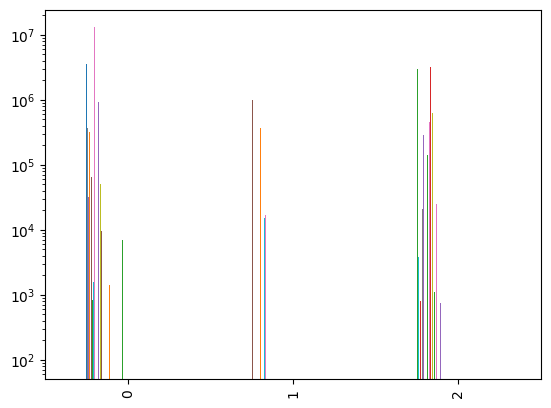

In [99]:
healthy[:3].plot(kind='bar', legend=False, logy=True);

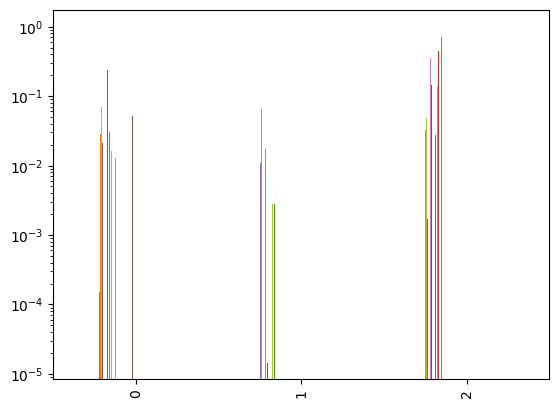

In [100]:
healthy_normalized = healthy.copy()   # Copying original dataframe

# Dividing each column by its maximum value
for column in healthy.columns:
    healthy_normalized[column] = healthy_normalized[column]  / healthy[column].abs().max()

# Plotting first 5 entries of normalized dataframe
healthy_normalized[:3].plot(kind='bar', legend=False, logy=True);

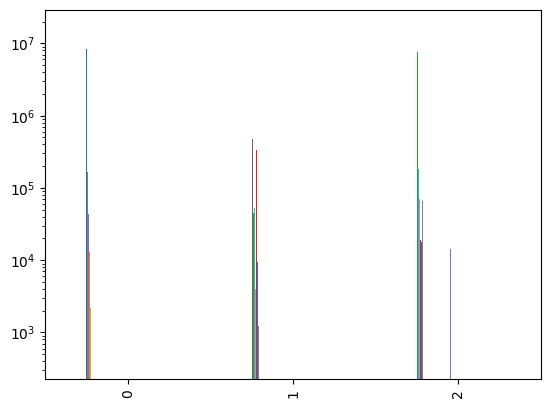

In [101]:
ibd[:3].plot(kind='bar', legend=False, logy=True);

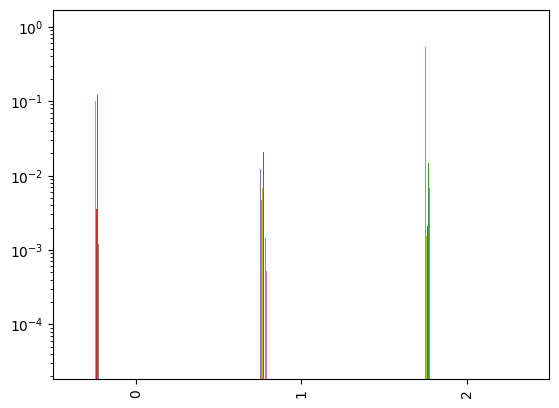

In [102]:
ibd_normalized = ibd.copy()   # Copying original dataframe

# Dividing each column by its maximum value
for column in ibd.columns:
    ibd_normalized[column] = ibd_normalized[column]  / ibd[column].abs().max()

# Plotting first 5 entries of normalized dataframe
ibd_normalized[:3].plot(kind='bar', legend=False, logy=True);

In [103]:
ibd_normalized.insert(0, 'IBD', 1);

<ipython-input-103-836459436a02>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ibd_normalized.insert(0, 'IBD', 1);


In [104]:
healthy_normalized.insert(0, 'IBD', 0);

<ipython-input-104-5689b795f7b5>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  healthy_normalized.insert(0, 'IBD', 0);


In [105]:
healthy_normalized.head()

,IBD,Phocaeicola vulgatus,Bacteroides uniformis,Bacteroides thetaiotaomicron,Faecalibacterium prausnitzii,Roseburia faecis,Bacteroides caccae,Enterocloster clostridioformis,Bacteroides fragilis,Fusicatenibacter saccharivorans,...,Prevotella histicola,Prevotella pallens,Chlamydia ibidis,Enterococcus mundtii,Anaerostipes sp. 992a,Actinobaculum sp. oral taxon 183,Lachnoclostridium sp. An298,Haemophilus haemolyticus,Enterococcus dispar,Atopobium minutum
0,0,0.145263,0.000000,0.223903,0.046683,0.003363,0.076529,0.0,0.019606,0.073251,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
1,0,0.249284,0.000000,0.537380,0.092369,0.010744,0.105768,0.0,0.029279,0.006809,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2,0,0.369208,0.032873,0.495284,0.221480,0.027061,0.280303,0.0,0.019889,0.048123,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
3,0,0.199211,0.052680,0.021410,0.088823,0.015632,0.047633,0.0,0.000000,0.095390,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
4,0,0.128560,0.000000,0.199190,0.069942,0.007968,0.086136,0.0,0.007128,0.053036,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [106]:
data = pd.concat([ibd_normalized, healthy_normalized]).sample(frac=1).set_index(np.arange(0, 1627))

X = data.drop('IBD', axis=1).fillna(0)
y = data['IBD']

## LassoCV

In [107]:
alphas = [10**(x) for x in np.arange(-4, 0, step=.5)]

lassoCV = LassoCV(cv = 5,
                alphas=alphas,
                random_state=42).fit(X, y)

Note: Here, examine what happens if you just get rid of all features with zero coefficients instead

In [108]:
for i in range(559):
  idx = np.argmin(np.abs(lassoCV.coef_))
  X = X.drop(X.columns[idx], axis=1)
  lassoCV.coef_ = np.delete(lassoCV.coef_, idx)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [109]:
coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, random_state=42)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

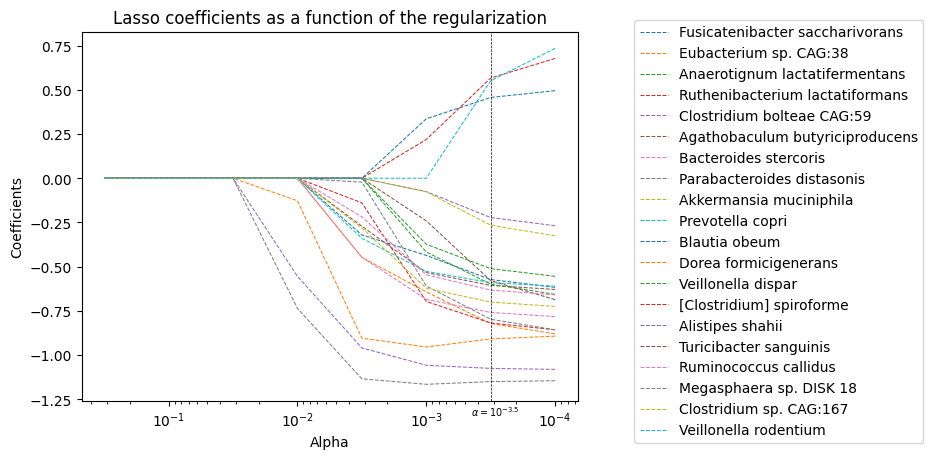

In [110]:
fig = plt.figure()
ax = plt.subplot(111)
trans = ax.get_xaxis_transform()

ax.plot(alphas, coefs, ls='dashed', lw=.75)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axvline(lassoCV.alpha_, lw=.5, ls='dashed', c='black')
plt.text(x=10**-3.35, y=-.04, s='$\\alpha = 10^{-3.5}$', fontsize='x-small', transform=trans)
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
ax.legend(X.columns, bbox_to_anchor=(1.1, 1.05))
plt.show()

## ElasticNetCV

In [111]:
X2 = data.drop('IBD', axis=1).fillna(0)
y2 = data['IBD']

In [112]:
l1_ratios = [.1, .5, .7, .9, .95, .99, 1]

enetCV = ElasticNetCV(l1_ratio=l1_ratios,
                      alphas=alphas,
                      cv=5,
                      random_state=1984).fit(X2, y2)

Note: Interestingly, ENetCV returned an L1 ration of .1, which leans more towards an L2 norm for feature selection. Maybe I will explore more values closer to 0 or also ridge regression.

In [113]:
for i in range(559):
  idx = np.argmin(np.abs(enetCV.coef_))
  X2 = X2.drop(X2.columns[idx], axis=1)
  enetCV.coef_ = np.delete(enetCV.coef_, idx)

In [114]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.2, random_state=1)

In [115]:
coefs = []

for a in alphas:
    enet = ElasticNet(alpha=a, random_state=1984)
    enet.fit(X2_train, y2_train)
    coefs.append(enet.coef_)

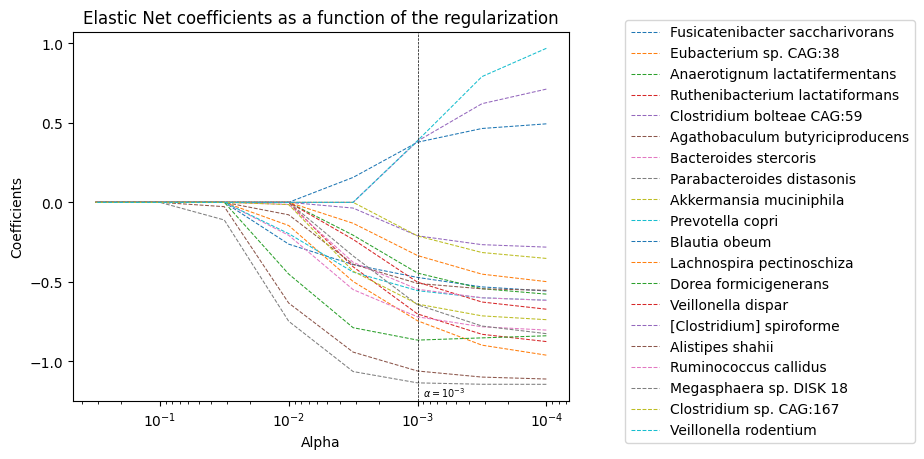

In [116]:
fig = plt.figure()
ax = plt.subplot(111)
trans = ax.get_xaxis_transform()

ax.plot(alphas, coefs, ls='dashed', lw=.75)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axvline(enetCV.alpha_, lw=.5, ls='dashed', c='black')
plt.text(enetCV.alpha_ - .0001 , y=.01, s='$\\alpha = 10^{-3}$', fontsize='x-small', transform=trans)
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Elastic Net coefficients as a function of the regularization")
plt.axis("tight")
ax.legend(X2.columns, bbox_to_anchor=(1.1, 1.05))
plt.show()

## Support Vector Machine

In [117]:
linear_params = {'C': [2.0**(x) for x in np.arange(-5, 16)],
                 'kernel': ['linear']}

radial_params = {'C': [2.0**(x) for x in np.arange(0, 13)],
                'gamma': [2.0**(x) for x in np.arange(-15, 4)],
                'kernel': ['rbf']}

svm_linear = GridSearchCV(SVC(), linear_params, refit=True, cv=5, verbose=0)
svm_radial = GridSearchCV(SVC(), radial_params, refit=True, cv=5, verbose=0)

svm_linear.fit(X_train, y_train)
svm_radial.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0,
                               256.0, 512.0, 1024.0, 2048.0, 4096.0],
                         'gamma': [3.0517578125e-05, 6.103515625e-05,
                                   0.0001220703125, 0.000244140625,
                                   0.00048828125, 0.0009765625, 0.001953125,
                                   0.00390625, 0.0078125, 0.015625, 0.03125,
                                   0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0,
                                   8.0],
                         'kernel': ['rbf']})

In [118]:
linear_pred = svm_linear.predict(X_test)

print(classification_report(y_test, linear_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        85
           1       0.91      0.94      0.92       241

    accuracy                           0.89       326
   macro avg       0.86      0.84      0.85       326
weighted avg       0.88      0.89      0.88       326



In [119]:
radial_pred = svm_radial.predict(X_test)

print(classification_report(y_test, radial_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        85
           1       0.93      0.97      0.95       241

    accuracy                           0.93       326
   macro avg       0.92      0.89      0.90       326
weighted avg       0.93      0.93      0.92       326



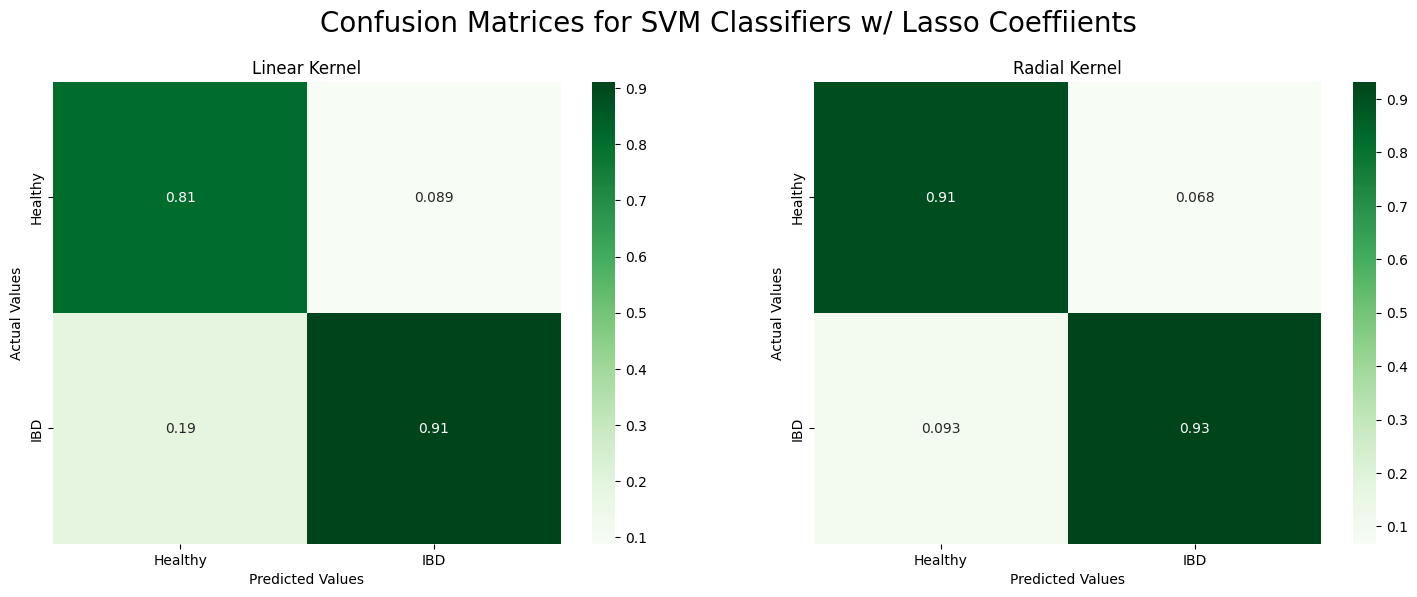

In [120]:
# Creating a confusion matrix for both linear and radial SVM classifier
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

c = confusion_matrix(y_test, linear_pred, normalize='pred')
axes[0] = sns.heatmap(c,
                      annot=True,
                      cmap='Greens',
                      xticklabels=['Healthy', 'IBD'],
                      yticklabels=['Healthy', 'IBD'],
                      cbar=True,
                      ax=axes[0]);

axes[0].set_ylabel('Actual Values')
axes[0].set_xlabel('Predicted Values')
axes[0].set_title('Linear Kernel');

c = confusion_matrix(y_test, radial_pred, normalize='pred')
axes[1] = sns.heatmap(c,
                      annot=True,
                      cmap='Greens',
                      xticklabels=['Healthy', 'IBD'],
                      yticklabels=['Healthy', 'IBD'],
                      cbar=True,
                      ax=axes[1]);

axes[1].set_ylabel('Actual Values')
axes[1].set_xlabel('Predicted Values')
axes[1].set_title('Radial Kernel');

fig.suptitle('Confusion Matrices for SVM Classifiers w/ Lasso Coeffiients', y=1, fontsize=20);

Note: The high false positive rate can be attributed to the fact that there are many more case samples than control samples.

In [121]:
svm_linear2 = GridSearchCV(SVC(), linear_params, refit=True, cv=5, verbose=0)
svm_radial2 = GridSearchCV(SVC(), radial_params, refit=True, cv=5, verbose=0)

svm_linear2.fit(X2_train, y2_train)
svm_radial2.fit(X2_train, y2_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0,
                               256.0, 512.0, 1024.0, 2048.0, 4096.0],
                         'gamma': [3.0517578125e-05, 6.103515625e-05,
                                   0.0001220703125, 0.000244140625,
                                   0.00048828125, 0.0009765625, 0.001953125,
                                   0.00390625, 0.0078125, 0.015625, 0.03125,
                                   0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0,
                                   8.0],
                         'kernel': ['rbf']})

In [122]:
linear_pred2 = svm_linear2.predict(X2_test)

print(classification_report(y2_test, linear_pred2))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        85
           1       0.91      0.93      0.92       241

    accuracy                           0.88       326
   macro avg       0.85      0.83      0.84       326
weighted avg       0.88      0.88      0.88       326



In [123]:
radial_pred2 = svm_radial2.predict(X2_test)

print(classification_report(y2_test, radial_pred2))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        85
           1       0.94      0.97      0.95       241

    accuracy                           0.93       326
   macro avg       0.92      0.90      0.91       326
weighted avg       0.93      0.93      0.93       326



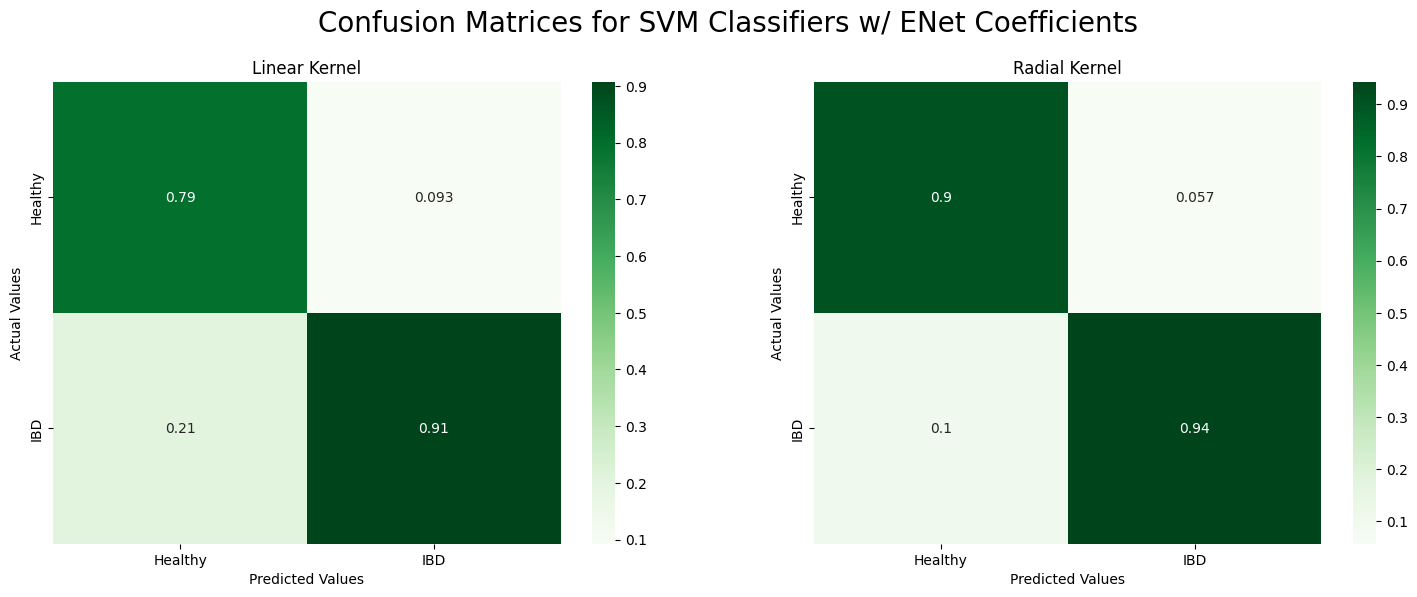

In [124]:
# Creating a confusion matrix for both linear and radial SVM classifier
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

c = confusion_matrix(y_test, linear_pred2, normalize='pred')
axes[0] = sns.heatmap(c,
                      annot=True,
                      cmap='Greens',
                      xticklabels=['Healthy', 'IBD'],
                      yticklabels=['Healthy', 'IBD'],
                      cbar=True,
                      ax=axes[0]);

axes[0].set_ylabel('Actual Values')
axes[0].set_xlabel('Predicted Values')
axes[0].set_title('Linear Kernel');

c = confusion_matrix(y_test, radial_pred2, normalize='pred')
axes[1] = sns.heatmap(c,
                      annot=True,
                      cmap='Greens',
                      xticklabels=['Healthy', 'IBD'],
                      yticklabels=['Healthy', 'IBD'],
                      cbar=True,
                      ax=axes[1]);

axes[1].set_ylabel('Actual Values')
axes[1].set_xlabel('Predicted Values')
axes[1].set_title('Radial Kernel');

fig.suptitle('Confusion Matrices for SVM Classifiers w/ ENet Coefficients', y=1, fontsize=20);

Note: At this point, the SVM classifier performs slightly worse with ENet coefficients than with Lasso coefficients. However, we will see what happens when both methods are implemented with the goal of finding the optimal subset of features, rather than just choosing 20 most important features.

## Random Forest Classifier

In [125]:
random_forest = RandomForestClassifier(n_estimators=500,
                                       criterion='gini',
                                       max_features='sqrt',
                                       class_weight='balanced',
                                       random_state=1984).fit(X_train, y_train)

In [126]:
rf_pred = random_forest.predict(X_test)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        85
           1       0.95      1.00      0.97       241

    accuracy                           0.96       326
   macro avg       0.97      0.92      0.95       326
weighted avg       0.96      0.96      0.96       326



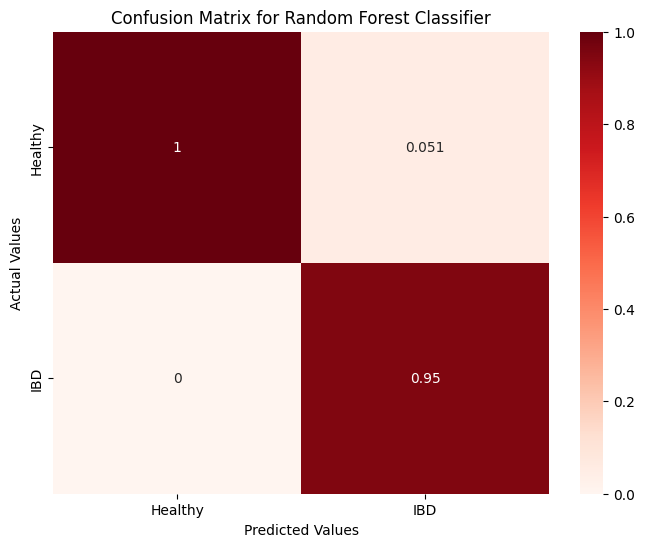

In [127]:
# Creating a confusion matrix for both linear and radial SVM classifier
fig, ax = plt.subplots(figsize=(8,6))

c = confusion_matrix(y_test, rf_pred, normalize='pred')
ax = sns.heatmap(c,
                      annot=True,
                      cmap='Reds',
                      xticklabels=['Healthy', 'IBD'],
                      yticklabels=['Healthy', 'IBD'],
                      cbar=True,
                      ax=ax);

ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Confusion Matrix for Random Forest Classifier');

In [128]:
# No significant difference when optimizing hyperparamets with grid search:

# rf_params = {'n_estimators': [50, 75, 100, 150, 200, 300, 400, 500],
#              'criterion': ['gini', 'entropy', 'log_loss'],
#              'max_features': ['sqrt', 'log2', None],
#              'class_weight': ['balanced', None],
#              'random_state': [1]}

# rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, refit=True, cv=5)

# rf_grid.fit(X_train, y_train)

### Next Steps:
* Use the optimal Lasso parameter rather than just choosing 20 most impotant features
  * Vary percentage of features selected and plot accuracy as a function of proportion of features to determine optimal proportion
* Plot ROC curves
* Use RF classifier with GridSearchCV and compare prediction accuracy
* Try to reproduce cross validation and cross study steps as described in Pasolli et al.
* Go to bigger studies, more diseases, different models
* More formatting in R
* Cross-validation across 20 independent runs and average results
* Why RF and SVMs? What other models might be good candidates?

In [129]:
X = data.drop('IBD', axis=1).fillna(0)
y = data['IBD']

In [130]:
alphas = [10**(x) for x in np.arange(-4, 0, step=.5)]

lassoCV = LassoCV(cv = 5,
                alphas=alphas,
                random_state=42).fit(X, y)

In [131]:
while(int(np.min(np.abs(lassoCV.coef_)) == 0)):

  idx = np.argmin(np.abs(lassoCV.coef_))
  X = X.drop(X.columns[idx], axis=1)
  lassoCV.coef_ = np.delete(lassoCV.coef_, idx)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1984)

In [133]:
linear_params = {'C': [2.0**(x) for x in np.arange(-5, 16)],
                 'kernel': ['linear']}

radial_params = {'C': [2.0**(x) for x in np.arange(0, 13)],
                'gamma': [2.0**(x) for x in np.arange(-15, 4)],
                'kernel': ['rbf']}

svm_linear = GridSearchCV(SVC(), linear_params, refit=True, cv=5, verbose=0)
svm_radial = GridSearchCV(SVC(), radial_params, refit=True, cv=5, verbose=0)

svm_linear.fit(X_train, y_train)
svm_radial.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0,
                               256.0, 512.0, 1024.0, 2048.0, 4096.0],
                         'gamma': [3.0517578125e-05, 6.103515625e-05,
                                   0.0001220703125, 0.000244140625,
                                   0.00048828125, 0.0009765625, 0.001953125,
                                   0.00390625, 0.0078125, 0.015625, 0.03125,
                                   0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0,
                                   8.0],
                         'kernel': ['rbf']})

In [134]:
linear_pred = svm_linear.predict(X_test)

print(classification_report(y_test, linear_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        87
           1       0.95      0.97      0.96       239

    accuracy                           0.94       326
   macro avg       0.93      0.92      0.92       326
weighted avg       0.94      0.94      0.94       326



In [135]:
radial_pred = svm_radial.predict(X_test)

print(classification_report(y_test, radial_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        87
           1       0.96      0.99      0.98       239

    accuracy                           0.96       326
   macro avg       0.97      0.94      0.95       326
weighted avg       0.96      0.96      0.96       326



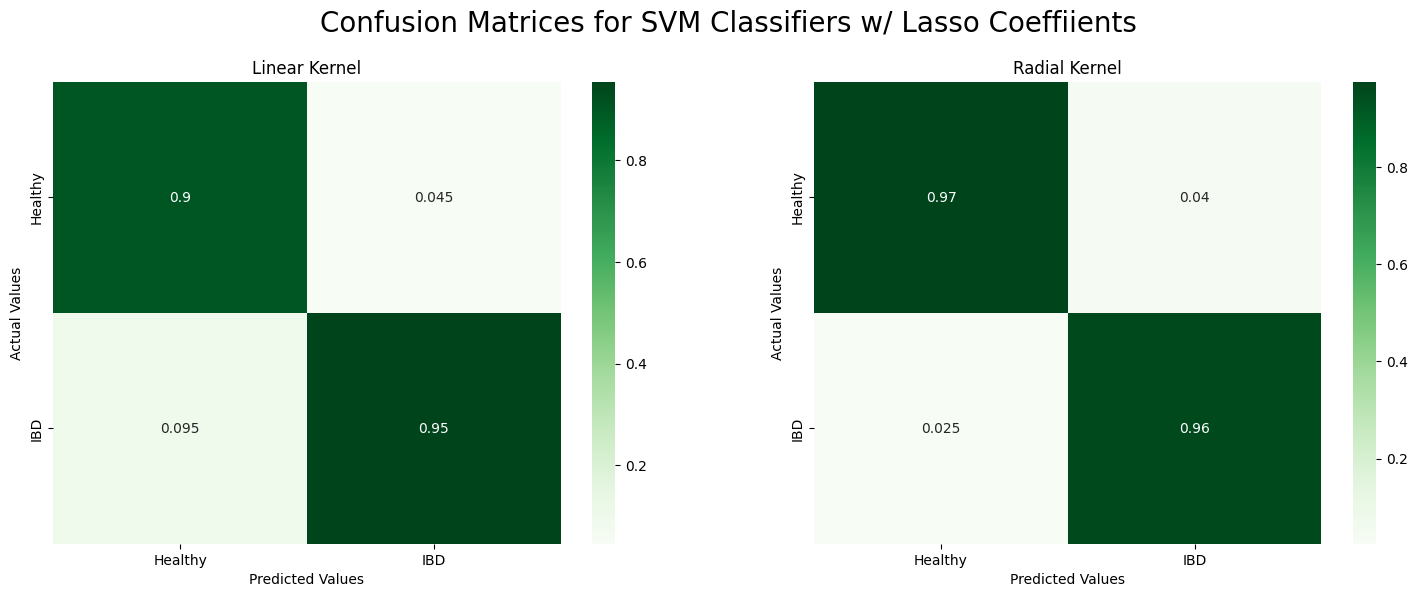

In [136]:
# Creating a confusion matrix for both linear and radial SVM classifier
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

c = confusion_matrix(y_test, linear_pred, normalize='pred')
axes[0] = sns.heatmap(c,
                      annot=True,
                      cmap='Greens',
                      xticklabels=['Healthy', 'IBD'],
                      yticklabels=['Healthy', 'IBD'],
                      cbar=True,
                      ax=axes[0]);

axes[0].set_ylabel('Actual Values')
axes[0].set_xlabel('Predicted Values')
axes[0].set_title('Linear Kernel');

c = confusion_matrix(y_test, radial_pred, normalize='pred')
axes[1] = sns.heatmap(c,
                      annot=True,
                      cmap='Greens',
                      xticklabels=['Healthy', 'IBD'],
                      yticklabels=['Healthy', 'IBD'],
                      cbar=True,
                      ax=axes[1]);

axes[1].set_ylabel('Actual Values')
axes[1].set_xlabel('Predicted Values')
axes[1].set_title('Radial Kernel');

fig.suptitle('Confusion Matrices for SVM Classifiers w/ Lasso Coeffiients', y=1, fontsize=20);

Currently working on plotting classification score as a function of percentage of features used in model training. This will help determine the optimal subset of features to use for both the SVM and RF classifiers.

In [156]:
percentiles = [.1 * x for x in np.arange(0, 10)]
total_lasso = lassoCV.coef_.size

svm_score = []
rf_score = []

for p in percentiles:

  svm = SVC()
  rf = RandomForestClassifier(n_estimators=100,
                                       criterion='gini',
                                       max_features='sqrt',
                                       class_weight='balanced',
                                       random_state=1984)

  W = X
  d = pd.DataFrame()
  coefs = []
  lasso_coefs = lassoCV.coef_

  '''
  Determining top p proportion of Lasso coefficients and
  building the corresponding dataframe to train
  '''
  for i in range(int((1-p) * total_lasso)):

    idx = np.argmax(np.abs(lasso_coefs))
    coefs.append(np.max(np.abs(lasso_coefs)))

    d = pd.concat([d, W[W.columns[idx]]], axis=1)

    lasso_coefs = np.delete(lasso_coefs, idx)
    W = W.drop(W.columns[idx], axis=1)

  d_train, d_test, y_train, y_test = train_test_split(d, y, test_size=.2, random_state=1)

  svm.fit(d_train, y_train)
  svm_score.append(svm.score(d_test, y_test))

  rf.fit(d_train, y_train)
  rf_score.append(rf.score(d_test, y_test))

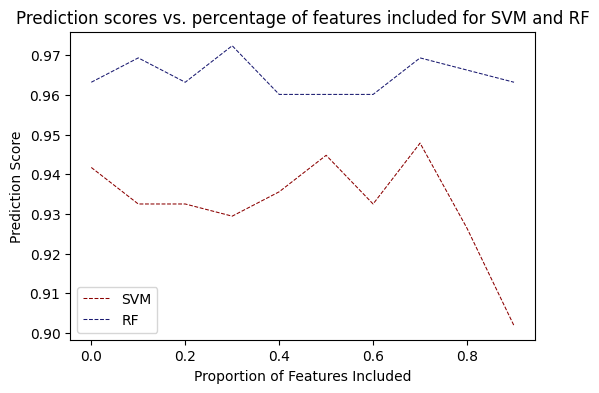

In [167]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(percentiles, svm_score, label='SVM', c='darkred', ls='dashed', lw=.75)
ax.plot(percentiles, rf_score, label='RF', c='midnightblue', ls='dashed', lw=.75)
ax.set_xlabel('Proportion of Features Included')
ax.set_ylabel('Prediction Score')
ax.set_title('Prediction scores vs. percentage of features included for SVM and RF')
ax.legend();